In [1]:
import cupy as cp
import cupyx
import scanpy as sc
import stlearn as st
import scanpy as sc
import numpy as np
from cupyx.scipy.sparse import csr_matrix
import os
from PIL import Image

/gpfs/gsfs10/users/kanferg/conda/envs/stlearn-env/lib/python3.8/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [2]:
path = "/data/kanferg/Sptial_Omics/playGround/Data/Xenium/output_temp"
pathout = "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out_1"
FilePrefix = "_072824" 

In [3]:
andata = sc.read_h5ad(os.path.join(pathout, "andata_save.h5ad"))

In [4]:
def load_matrix(andata,pathout,npz_file = "obsp_distances.npz",mode = 'sparse', mat_name = 'distances'):
    npzfile = cp.load(os.path.join(pathout, npz_file))
    data = cp.array(npzfile['data'])
    indices = cp.array(npzfile['indices'])
    indptr = cp.array(npzfile['indptr'])
    shape = tuple(npzfile['shape'])
    
    # Reconstruct the sparse matrix
    sparse_matrix_distances = csr_matrix((data, indices, indptr), shape=shape)
    if mode== 'sparse':
        andata.obsp[mat_name] = sparse_matrix_distances
    else:
        andata.obsp[mat_name] = sparse_matrix_distances.get()
    return andata

In [5]:
andata = load_matrix(andata,pathout,npz_file = "obsp_distances.npz",mode = 'sparse', mat_name = 'distances')
andata = load_matrix(andata,pathout,npz_file = "connectivities.npz",mode = 'sparse', mat_name = 'connectivities')

In [6]:
andata

AnnData object with n_obs × n_vars = 100000 × 1500
    obs: 'n_genes_by_counts', 'total_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_MT', 'pct_counts_MT', 'log1p_total_counts_MT', 'cell_centroid_x', 'cell_centroid_y', 'cell_area', 'nucleus_centroid_x', 'nucleus_centroid_y', 'nucleus_area', 'z_level', 'nucleus_count', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts', 'log1p_total_counts', 'log1p_mean_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    obsm: 'X_pca', 'spatial'
    obsp: 'distances', 'connectivities'

In [7]:
andata.obs["imagecol"] = andata.obs["cell_centroid_x"]
andata.obs["imagerow"] = andata.obs["cell_centroid_y"]

In [8]:
andata.uns["spatial"] = andata.obsm["spatial"]

Load blank image to uns

In [ ]:
adata.uns["spatial"] = {}
adata.uns["spatial"][library_id] = {}
adata.uns["spatial"][library_id]["images"] = {}
adata.uns["spatial"][library_id]["images"][quality] = imgarr
adata.uns["spatial"][library_id]["use_quality"] = quality
adata.uns["spatial"][library_id]["scalefactors"] = {}
adata.uns["spatial"][library_id]["scalefactors"][
    "tissue_" + quality + "_scalef"
] = scale
adata.uns["spatial"][library_id]["scalefactors"][
    "spot_diameter_fullres"
] = spot_diameter_fullres

In [36]:
def make_uns_spatial(adata):
    max_size = np.max([adata.obs["imagecol"].max(), adata.obs["imagerow"].max()])
    max_size = int(max_size + 0.1 * max_size)
    image = Image.new("RGBA", (max_size, max_size), (255, 255, 255, 255))
    imgarr = np.array(image)
    adata.uns["spatial"] = {}
    adata.uns["spatial"]["id1"] = {}
    adata.uns["spatial"]["id1"]["images"] = {}
    adata.uns["spatial"]["id1"]["images"]["lowres"] = imgarr
    adata.uns["spatial"]["id1"]["use_quality"] = "lowres"
    adata.uns["spatial"]["id1"]["scalefactors"] = {}
    adata.uns["spatial"]["id1"]["scalefactors"]["tissue_low_scalef" ] = 1
    adata.uns["spatial"]["id1"]["scalefactors"]["spot_diameter_fullres"] = 15
    adata.uns["spatial"]["id1"]["scalefactors"][
            "tissue_" + "lowres" + "_scalef"
        ] = 1
    return adata
andata = make_uns_spatial(andata)

loading data from directory

In [57]:
### Calculating the number of grid spots we will generate
n_ = 75
print(f'{n_} by {n_} has this many spots:\n', n_*n_)

75 by 75 has this many spots:
 5625


In [58]:
### Gridding.
grid = st.tl.cci.grid(andata, n_row=n_, n_col=n_, use_label = 'cluster')
print( grid.shape ) # Slightly less than the above calculation, since we filter out spots with 0 cells.

Gridding...
(3483, 1500)


In [62]:
signature = inspect.signature(st.pl.cluster_plot) 

print("Signature of st.pl.cluster_plot:\n") 

for param in signature.parameters.values(): 

    print(f"{param.name}: {param.annotation} = {param.default}") 

Signature of st.pl.cluster_plot:

adata: <class 'anndata._core.anndata.AnnData'> = <class 'inspect._empty'>
title: typing.Union[ForwardRef('str'), NoneType] = None
figsize: typing.Union[typing.Tuple[float, float], NoneType] = None
cmap: typing.Union[str, NoneType] = default
use_label: typing.Union[str, NoneType] = None
list_clusters: typing.Union[list, NoneType] = None
ax: typing.Union[matplotlib.axes._axes.Axes, NoneType] = None
fig: typing.Union[matplotlib.figure.Figure, NoneType] = None
show_plot: typing.Union[bool, NoneType] = True
show_axis: typing.Union[bool, NoneType] = False
show_image: typing.Union[bool, NoneType] = True
show_color_bar: typing.Union[bool, NoneType] = True
zoom_coord: typing.Union[float, NoneType] = None
crop: typing.Union[bool, NoneType] = True
margin: typing.Union[bool, NoneType] = 100
size: typing.Union[float, NoneType] = 5
image_alpha: typing.Union[float, NoneType] = 1.0
cell_alpha: typing.Union[float, NoneType] = 1.0
fname: typing.Union[str, NoneType] = No

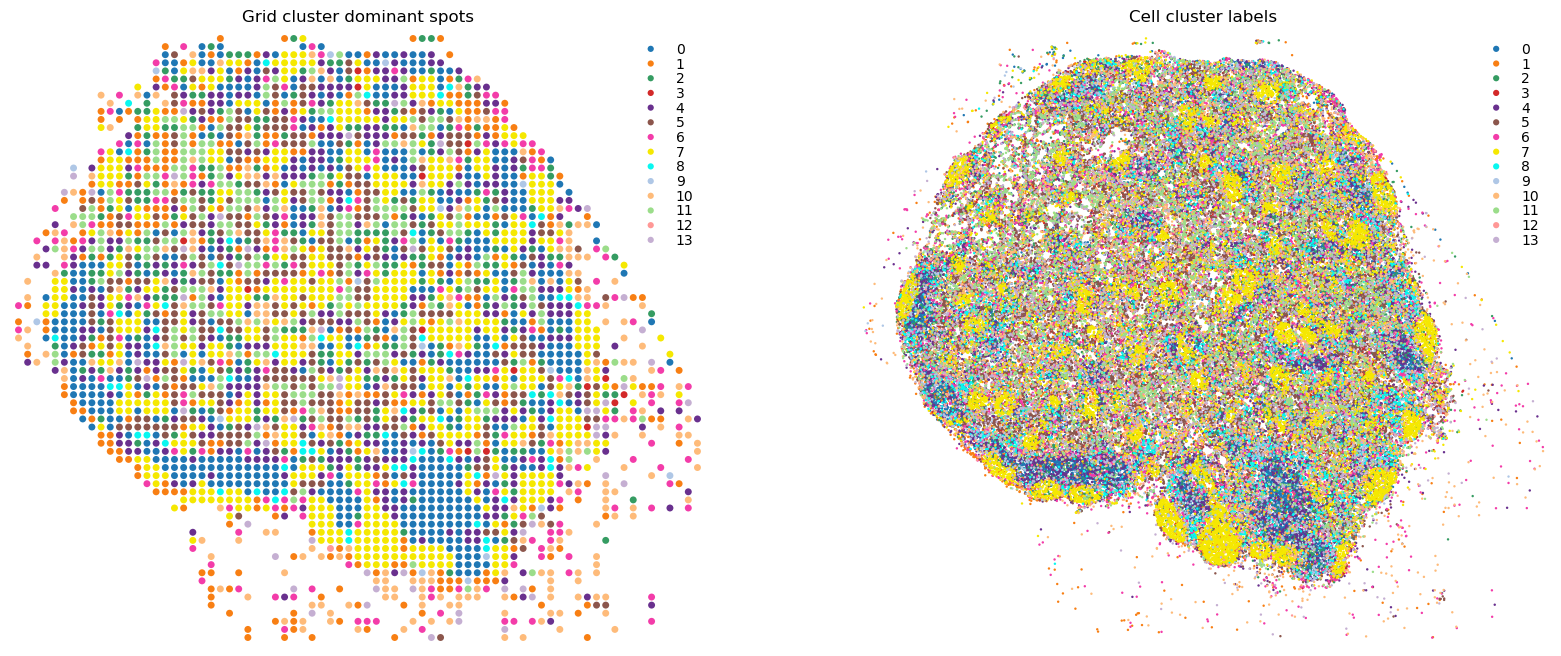

In [107]:
# color shuffle is not working
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import random
palette = sns.color_palette("tab20") + sns.color_palette("tab20b") + sns.color_palette("tab20c")
random.shuffle(palette)
cmap = LinearSegmentedColormap.from_list(name= "test",colors = palette)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
st.pl.cluster_plot(grid, use_label='cluster', size=25, ax=axes[0],cmap = cmap, show_plot=False)
st.pl.cluster_plot(andata, use_label='cluster',size=3, ax=axes[1],cmap = cmap, show_plot=False)
axes[0].set_title(f'Grid cluster dominant spots')
axes[1].set_title(f'Cell cluster labels')
plt.show()

In [21]:
# Loading the LR databases available within stlearn (from NATMI)
lrs = st.tl.cci.load_lrs(['connectomeDB2020_lit'], species='human')
print(len(lrs))

2293


In [24]:
# Running the analysis #
st.tl.cci.run(grid, lrs,
                  min_spots = 20, #Filter out any LR pairs with no scores for less than min_spots
                  distance=0, # None defaults to spot+immediate neighbours; distance=0 for within-spot mode
                  n_pairs=10000, # Number of random pairs to generate; low as example, recommend ~10,000
                  n_cpus=None, # Number of CPUs for parallel. If None, detects & use all available.
                  )

Calculating neighbours...
0 spots with no neighbours, 1 median spot neighbours.
Spot neighbour indices stored in adata.obsm['spot_neighbours'] & adata.obsm['spot_neigh_bcs'].
Altogether 269 valid L-R pairs


Generating backgrounds & testing each LR pair...: 100%|████████████████████████████ [ time left: 00:00 ]


Storing results:

lr_scores stored in adata.obsm['lr_scores'].
p_vals stored in adata.obsm['p_vals'].
p_adjs stored in adata.obsm['p_adjs'].
-log10(p_adjs) stored in adata.obsm['-log10(p_adjs)'].
lr_sig_scores stored in adata.obsm['lr_sig_scores'].

Per-spot results in adata.obsm have columns in same order as rows in adata.uns['lr_summary'].
Summary of LR results in adata.uns['lr_summary'].


In [23]:
grid.uns['lr_summary']

,n_spots,n_spots_sig,n_spots_sig_pval
CXCL12_CXCR4,7537,2016,4015
CXCL12_CD4,7213,1196,2564
CP_SLC40A1,3390,798,1865
SLAMF7_SLAMF7,5004,606,958
CXCL12_ITGAV,2107,565,1293
...,...,...,...
CCN2_NTRK1,29,21,29
FGF23_FGFR1,28,19,28
CXCL2_CXCR1,26,18,26
FGF4_NRP1,25,18,25
